In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso ,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
##df['total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x= df.drop('math_score',axis=1)


In [8]:
y=df['math_score']

In [9]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
#transormaiton
num_feature =x.select_dtypes(exclude='object').columns
cat_feature=x.select_dtypes(include='object').columns

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

std_sclr = StandardScaler()
ohe_edr = OneHotEncoder()
pre_pross = ColumnTransformer(
    [
        ('cat_transformer',ohe_edr,cat_feature),
        ('num_transformet',std_sclr,num_feature)
    ]
)

In [12]:
x.shape

(1000, 7)

In [13]:
x=pre_pross.fit_transform(x)

In [14]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.35,random_state=42)

In [16]:
def evel(true,predict):
    r2_scor = r2_score(true,predict)
    mse=mean_squared_error(true,predict)
    mae =mean_squared_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    return  mae,mse,rmse,r2_scor

In [17]:
models ={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'ElasticNet':ElasticNet(),
    'SVR':SVR(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'XGBregressor':XGBRegressor()
    

}
r2 =[]
modellist =[]

In [18]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
   

    y_train_prd =model.predict(X_train)
    y_test_prd = model.predict(X_test)

    mse_train,mae_train,rmse_train ,r2_score_train=evel(y_train,y_train_prd)
    mse_test,mae_test,rmse_test,r2_scoretest =evel(y_test,y_test_prd)

    print(list(models.keys())[i])
    modellist.append(list(models.keys())[i])
    print('Y_Train predicition')
    print('mean_absolute_error:{:.4f}'.format(mae_train))
    print('mean_squared_error:{:.4f}'.format(mse_train))
    print('Root_mean_squared_error:{:.4f}'.format(rmse_train))
    print('r2_score:{:.4f}'.format(r2_score_train))

    print('-'*36)

    print('Y_test prediction')
    print('mean_absolute_error:{:.4f}'.format(mae_test))
    print('mean_squared_error:{:.4f}'.format(mse_test))
    print('Root_mean_squared_error:{:.4f}'.format(rmse_test))
    print(print('r2_score:{:.4f}'.format(r2_scoretest)))
    r2.append(r2_scoretest)
    print('='*36)
    print('\n')






LinearRegression
Y_Train predicition
mean_absolute_error:27.3627
mean_squared_error:27.3627
Root_mean_squared_error:5.2309
r2_score:0.8761
------------------------------------
Y_test prediction
mean_absolute_error:30.1729
mean_squared_error:30.1729
Root_mean_squared_error:5.4930
r2_score:0.8710
None


Ridge
Y_Train predicition
mean_absolute_error:27.3767
mean_squared_error:27.3767
Root_mean_squared_error:5.2323
r2_score:0.8761
------------------------------------
Y_test prediction
mean_absolute_error:30.1417
mean_squared_error:30.1417
Root_mean_squared_error:5.4901
r2_score:0.8711
None


Lasso
Y_Train predicition
mean_absolute_error:44.3775
mean_squared_error:44.3775
Root_mean_squared_error:6.6616
r2_score:0.7991
------------------------------------
Y_test prediction
mean_absolute_error:44.7844
mean_squared_error:44.7844
Root_mean_squared_error:6.6921
r2_score:0.8085
None


ElasticNet
Y_Train predicition
mean_absolute_error:59.6358
mean_squared_error:59.6358
Root_mean_squared_error:7.7

In [19]:
pd.DataFrame(list(zip(modellist,r2)),columns=['model_name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model_name,r2_score
1,Ridge,0.871137
0,LinearRegression,0.871003
9,GradientBoostingRegressor,0.854860
6,RandomForestRegressor,0.843819
8,AdaBoostRegressor,0.826039
2,Lasso,0.808535
10,XGBregressor,0.801761
5,KNeighborsRegressor,0.770421
3,ElasticNet,0.734070
4,SVR,0.672883


In [20]:
model_lin = LinearRegression(fit_intercept=True)
model_lin=model_lin.fit(X_train,y_train)
Y_pred =model_lin.predict(X_test)
score = r2_score(y_test,Y_pred)*100
print('Acuracy of the mode %.2f' %score)


Acuracy of the mode 87.10


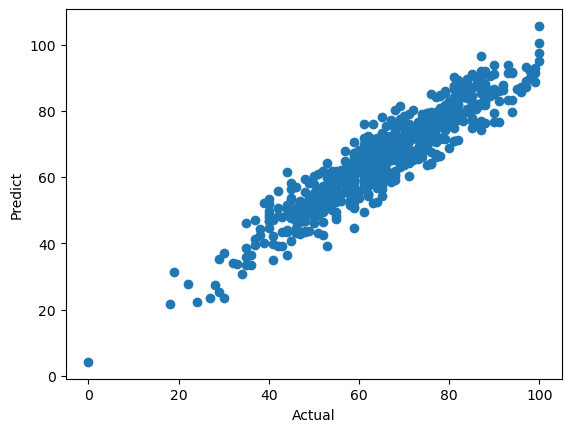

In [21]:
plt.scatter(y_test,Y_pred);
plt.xlabel('Actual');
plt.ylabel('Predict');

<Axes: xlabel='math_score'>

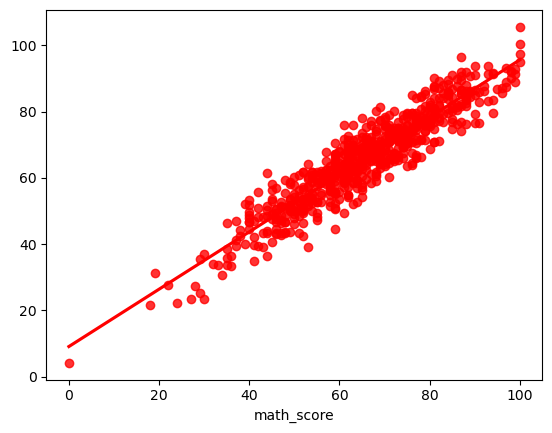

In [22]:
import seaborn as sns
sns.regplot(x=y_test,y=Y_pred,ci=None,color='red')

In [23]:
df_x = pd.DataFrame({'Actual_value':y_test,'Predicted_value':Y_pred,'difference':y_test-Y_pred})

In [24]:
df_x

,Actual_value,Predicted_value,difference
521,91,76.590714,14.409286
737,53,59.748037,-6.748037
740,80,77.123684,2.876316
660,74,77.891960,-3.891960
411,84,88.340240,-4.340240
...,...,...,...
469,91,82.961033,8.038967
967,63,68.930110,-5.930110
850,71,71.593663,-0.593663
704,59,50.740175,8.259825
